# PCA as a Factor Model - Coding Exercises


### Introduction

As we learned in the previous lessons, we can use PCA to create a factor model of risk. Our risk factor model represents the return as:

$$
\textbf{r} = \textbf{B}\textbf{f} + \textbf{s}
$$

where $\textbf{r}$ is a matrix containing the asset returns, $\textbf{B}$ is a matrix representing the factor exposures, $\textbf{f}$ is the matrix of factor returns, and $\textbf{s}$ is the idiosyncratic risk (also known as the company specific risk).

In this notebook, we will use real stock data to calculate:

* The Factor Exposures (Factor Betas) $\textbf{B}$
* The Factor Returns $\textbf{f}$
* The Idiosyncratic Risk Matrix $\textbf{S}$
* The Factor Covariance Matrix $\textbf{F}$

We will then combine these quantities to create our Risk Model. 

### Install Packages

In [1]:
import sys
!{sys.executable} -m pip install -r requirements.txt

    100% |████████████████████████████████| 2.5MB 192kB/s eta 0:00:01    32% |██████████▌                     | 808kB 36.7MB/s eta 0:00:01
    100% |████████████████████████████████| 92kB 3.8MB/s eta 0:00:01
    100% |████████████████████████████████| 112kB 3.5MB/s eta 0:00:01
    100% |████████████████████████████████| 143kB 3.2MB/s eta 0:00:01
    100% |████████████████████████████████| 112kB 4.2MB/s eta 0:00:01
    100% |████████████████████████████████| 624kB 740kB/s eta 0:00:01
    100% |████████████████████████████████| 1.0MB 446kB/s eta 0:00:01
    100% |████████████████████████████████| 51kB 3.2MB/s eta 0:00:01
    100% |████████████████████████████████| 3.8MB 124kB/s eta 0:00:01    33% |██████████▉                     | 1.3MB 35.3MB/s eta 0:00:01
    100% |████████████████████████████████| 102kB 3.8MB/s ta 0:00:01
  Running setup.py bdist_wheel for zipline ... done
  Stored in directory: /root/.cache/pip/wheels/a4/d6/67/f303ab028b004bf8e00c05b5b04fba83d8ec238b6547becdb7
  Runn

# Get Returns

In this notebook, we will get the stock returns using Zipline and data from Quotemedia, just as we learned in previous lessons. The function `get_returns(start_date, end_date)` in the `utils` module, gets the data from the Quotemedia data bundle and produces the stock returns for the given `start_date` and `end_date`. You are welcome to take a look at the `utils` module to see how this is done.

In the code below, we use `utils.get_returns` funtion to get the returns for stock data between `2011-01-05` and `2016-01-05`. You can change the start and end dates, but if you do, you have to make sure the dates are valid trading dates. 

In [2]:
import utils

# Get the returns for the fiven start and end date. Both dates must be valid trading dates
returns = utils.get_returns(start_date='2011-01-05', end_date='2016-01-05')

# Display the first rows of the returns
returns.head()

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABC]),Equity(6 [ABT]),Equity(7 [ACN]),Equity(8 [ADBE]),Equity(9 [ADI]),...,Equity(481 [XL]),Equity(482 [XLNX]),Equity(483 [XOM]),Equity(484 [XRAY]),Equity(485 [XRX]),Equity(486 [XYL]),Equity(487 [YUM]),Equity(488 [ZBH]),Equity(489 [ZION]),Equity(490 [ZTS])
2011-01-07 00:00:00+00:00,0.008437,0.014230,0.026702,0.007146,0.0,0.001994,0.004165,0.001648,-0.007127,-0.005818,...,-0.001838,-0.005619,0.005461,-0.004044,-0.013953,0.0,0.012457,-0.000181,-0.010458,0.0
2011-01-10 00:00:00+00:00,-0.004174,0.006195,0.007435,0.018852,0.0,-0.005714,-0.008896,-0.008854,0.028714,0.002926,...,0.000947,0.007814,-0.006081,0.010466,0.009733,0.0,0.001440,0.007784,-0.017945,0.0
2011-01-11 00:00:00+00:00,-0.001886,-0.043644,-0.005927,-0.002367,0.0,0.009783,-0.002067,0.013717,0.000607,0.008753,...,0.001314,0.010179,0.007442,0.007351,0.006116,0.0,-0.006470,0.035676,0.007467,0.0
2011-01-12 00:00:00+00:00,0.017254,-0.008237,0.013387,0.008133,0.0,-0.005979,-0.001011,0.022969,0.017950,0.000257,...,0.004986,0.015666,0.011763,0.027182,0.004386,0.0,0.002631,0.014741,-0.011903,0.0
2011-01-13 00:00:00+00:00,-0.004559,0.000955,0.003031,0.003657,0.0,0.014925,-0.004451,-0.000400,-0.005719,-0.005012,...,0.030499,-0.003217,0.001694,0.000547,-0.018235,0.0,-0.005084,-0.004665,-0.009178,0.0


# TODO: Factor Exposures

In the code below, write a function, `factor_betas(pca, factor_beta_indices, factor_beta_columns)` that calculates the factor exposures from Scikit-Learn's `PCA()` class. Remember the matrix of factor exposures, $\textbf{B}$, describes the coordintates of the Principal Components in the original basis. The `pca` parameter must be a Scikit-Learn's pca object, that has fit the model with the returns. In other words, you must first run `pca.fit(returns)` before passing this parameter into the function. Later in this notebook we will create a function, `fit_pca()`, that will fit the pca model and return the `pca`object. The `factor_beta_indices` parameter must be a 1 dimensional ndarray containg the column names of the `returns` dataframe. The `factor_beta_columns` parameter must be a 1 dimensional ndarray containing evenly spaced integers from 0 up to the number of principal components you used in your `pca` model minus one. For example, if you used 5 principal compoenents in your `pca` model, `pca = PCA(n_components = 5)`, then `factor_beta_columns = [0, 1, 2, 3, 4]`. This function has to return a Pandas dataframe with the factor exposures, where the `factor_beta_indices` correspond to the indices of the dataframe and the `factor_beta_columns` correspond to the column names of the dataframe. 

In [3]:
from sklearn.decomposition import PCA
pca = PCA(n_components=returns.shape[1])
pca.fit(returns.values)

PCA(copy=True, iterated_power='auto', n_components=490, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [4]:

from sklearn.decomposition import PCA

def factor_betas(pca, factor_beta_indices, factor_beta_columns):
    '''
    Constructs new dataframe with pca object principal components
    in the original basis coordinate system
    
    Parameters
    ==========
    pca: 
        sklearn.decomposition.PCA object fitted with returns df
    factor_beta_indices: 
        1-D np.ndarray containing column names of the returns dataframe
    factor_beta_columns: 
        1-d ndarray containing evenly spaced integers from 0 up to # principial components minus 1
        
        
    Returns
    =======
    
    pd.Dataframe with factor_beta_indices as rows and factor_beta_columns as columns
    
    '''
        
    return pd.DataFrame(
                        data=pca.components_.T, 
                        index=factor_beta_indices, 
                        columns=factor_beta_columns
                        )
    


# TODO: Factor Retuns

In the code below, write a function, `factor_returns(pca, returns, factor_return_indices, factor_return_columns)` that calculates the factor returns from Scikit-Learn's `PCA()` class. Remember the matrix of factor returns, $\textbf{f}$, represents the `returns` written in the **new** basis. The `pca` parameter must be a Scikit-Learn's pca object, that has fit the model with the returns. In other words, you must first run `pca.fit(returns)` before passing this parameter into the function. Later in this notebook we will create a function, `fit_pca()`, that will fit the pca model and return the `pca`object. The `returns` parameter is the pandas dataframe of returns given at the begining of the notebook. The `factor_return_indices` parameter must be a 1 dimensional ndarray containing the trading dates (Pandas `DatetimeIndex`) in the `returns` dataframe. The `factor_return_columns` parameter must be a 1 dimensional ndarray containing evenly spaced integers from 0 up to the number of principal components you used in your `pca` model minus one. For example, if you used 5 principal compoenents in your `pca` model, `pca = PCA(n_components = 5)`, then `factor_beta_columns = [0, 1, 2, 3, 4]`. This function has to return a Pandas dataframe with the factor returns, where the `factor_return_indices` correspond to the indices of the dataframe and the `factor_return_columns` correspond to the column names of the dataframe.

In [5]:
import pandas as pd 

def factor_returns(pca, returns, factor_return_indices, factor_return_columns):
    '''
    Uses sklearn pca.transform to project returns into the new basis. 
    Returns the factor returns for in the new basis.
    
    Parameters
    ==========
    pca: 
        sklearn.decomposition.PCA object fitted with returns df
    factor_return_indices: 
        1-D np.ndarray containing index of trading dates factor returns dataframe
    factor_return_columns: 
        1-d ndarray containing evenly spaced integers from 0 up to # principial components minus 1
        
        
    Returns
    =======
    
    pd.Dataframe of returns in the new basis 
        with factor_return_indices as rows and factor_return_columns as columns
    
    '''
    
    return pd.DataFrame(
                        data=pca.transform(returns), 
                        index=factor_return_indices,
                        columns=factor_return_columns
                        )


# TODO: Idiosyncratic Risk Matrix

Let's review how we can calculate the Idiosyncratic Risk Matrix $\textbf{S}$. We know that: 

$$
\textbf{s} = \textbf{r} - \textbf{B}\textbf{f}
$$

We refer to $\textbf{s}$ as the residuals. To calculate the idiosyncratic or specific risk matrix $\textbf{S}$, we have to calculate the covariance matrix of the residuals, $\textbf{s}$, and set the off-diagonal elements to zero. 

With this in mind, in the code below cerate a function, `idiosyncratic_var_matrix(returns, factor_returns, factor_betas, ann_factor)` that calclates the **annualized** Idiosyncratic Risk Matrix. The `returns` parameter is the pandas dataframe of returns given at the begining of the notebook. The `factor_returns` parameter is the output of the `factor_returns()` function created above. Similarly, the `factor_betas` parameter is the output of the `factor_betas()` function created above. The `ann_factor` parameter is an integer representing the annualization factor. 

Remember that if the `returns` time series are daily returns, then when we calculate the Idiosyncratic Risk Matrix we will get values on a daily basis. We can annualize these values simply by multiplying the whole Idiosyncratic Risk Matrix by an annualization factor of 252. Remember we don't need the square root of the factor because our numbers here are variances not standard deviations.

The function must return a pandas dataframe with the annualized Idiosyncratic Risk Matrix containing the covariance of the residuals in its main diagonal and with all the off-diagonal elements set to zero. 

In [6]:
def idiosyncratic_var_matrix(returns, factor_returns, factor_betas, ann_factor):
    '''
    Our matrix of residuals that represents the difference of the observed returns minus
    the product of factor returns matrix and beta factors matrix. 
    
    Parameters
    ==========
    returns: pd.DataFrame of asset returns of shape N companies by M time steps
    factor_returns: pd.DataFrame of asset returns in the new basis
    factor_betas: pd.DataFrame of betas for the principal components
    ann_factor: annualization factor
    
    Returns
    =======
    pd.DataFrame of residuals with the 
        annualized Idiosyncratic Risk Matrix containing the 
        covariance of the residuals in its main diagonal
    
    '''
    common_returns_ = pd.DataFrame(np.dot(factor_returns, factor_betas.T), returns.index, returns.columns)
    
    residuals_ = (returns - common_returns_)
    
    return pd.DataFrame(np.diag(np.var(residuals_))*ann_factor, returns.columns, returns.columns)
    


# TODO: Factor Covariance Matrix

To calculate the annualized factor covariance matrix, $\textbf{F}$, we use the following equation:

$$
\textbf{F} = \frac{1}{N -1}\textbf{f}\textbf{f}^T
$$

where, $N$ is the number of elements in $\textbf{f}$. Recall that the factor covariance matrix, $\textbf{F}$, is a diagonal matrix.

With this in mind, create a function, `factor_cov_matrix(factor_returns, ann_factor)` that calculates the annualized factor covariance matrix from the factor returns $\textbf{f}$. The `factor_returns` parameter is the output of the `factor_returns()` function created above and the `ann_factor` parameter is an integer representing the annualization factor. The function must return a diagonal numpy ndarray 

**HINT :** You can calculate the factor covariance matrix $\textbf{F}$ very easily using Numpy's `.var` method. The $\frac{1}{N -1}$ factor can be taken into account using the `ddof` keyword. 

In [7]:
def factor_cov_matrix(factor_returns, ann_factor):
    '''
    Calculates the diagonal annualized factor covariance Matrix
    
    Parameters
    ==========
    factor_returns: pd.DataFrame of new basis
    ann_factor: np.float
    
    Returns
    =======
    np.ndarray of annualized factor covariance
    
    '''
    return np.diag(factor_returns.var(axis=0, ddof=1)*ann_factor)
 
    
    


# TODO: Perfom PCA

In the code below, create a function, `fit_pca(returns, num_factor_exposures, svd_solver)` that uses Scikit-Learn's `PCA()` class to fit the `returns` dataframe with the given number of `num_factor_exposures` (Principal Components) and with the given `svd_solver`. The `returns` parameter is the pandas dataframe of returns given at the begining of the notebook. The `num_factor_exposures` parameter is an integer representing the number of Principal Components you want to use in your PCA algorithm. The `svd_solver` parameter is a string that determines the type of solver you want to use in your PCA algorithm. To see the type of solvers that you can use, see the [Scikit-Learn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html). The function must fit the `returns` and return the `pca` object. 

In [8]:
from sklearn.decomposition import PCA

def fit_pca(returns, num_factor_exposures, svd_solver):
    '''
    Wrapper for sklearn PCA class
    
    Parameters
    ==========
    returns: pd.DataFrame
    num_factor_exposures: int
    svd_solver: string for 
    
    Returns
    =======
    sklearn.decomposition.PCA object fitted with the returns values
    '''
    pca = PCA(
            n_components=num_factor_exposures, 
            svd_solver=svd_solver)
    
    pca.fit(returns)
    
    return pca
    


# TODO: Create The Risk Model


In the code below, create a class:

```python
class RiskModel(object):
    def __init__(self, returns, ann_factor, num_factor_exposures, pca):
```

where the `returns` parameter is the pandas dataframe of returns given at the begining of the notebook. The `ann_factor` parameter is an integer representing the annualization factor. The `num_factor_exposures` parameter is an integer representing the number of Principal Components you want to use in your PCA algorithm. The `pca` parameter is the output of the `fit_pca()` function created above. The class must contain all the fucntions created above. For example, to include the Factor covariance matrix we will use:

```python
self.factor_cov_matrix_ = factor_cov_matrix(self.factor_returns_, ann_factor)
```

In [9]:
import numpy as np

class RiskModel(object):
    
    def __init__(self, returns, ann_factor, num_factor_expenses, pca):
        
        self.factor_betas_ = factor_betas(pca, returns.columns.values, np.arange(num_factor_exposures))
        
        self.factor_returns_ = factor_returns(pca, returns, returns.index, np.arange(num_factor_exposures))
        
        self.factor_cov_matrix_ = factor_cov_matrix(self.factor_returns_, ann_factor)
        
        self.idiosyncratic_var_matrix_ = idiosyncratic_var_matrix(returns, self.factor_returns_, self.factor_betas_, ann_factor)
        

# Set the annualized factor
ann_factor = 252

# Set the number of factor exposures (principal components) for the PCA algorithm
num_factor_exposures = 10

# Set the svd solver for the PCA algorithm
svd_solver = 'full'

# Fit the PCA Model using the fit_pca() fucntion 
pca = fit_pca(returns,num_factor_exposures, svd_solver)

# Create a RiskModel object
rm = RiskModel(returns, ann_factor, num_factor_exposures, pca)

# TODO: Print The Factor Exposures

In [12]:
# Display the Factor Exposures
rm.factor_betas_.head()

,0,1,2,3,4,5,6,7,8,9
Equity(0 [A]),-0.043168,0.019551,-0.009934,0.010540,-0.018198,0.010745,0.001129,0.039739,-0.013805,0.012737
Equity(1 [AAL]),-0.058745,0.196377,0.078688,0.082096,0.348478,-0.138082,0.071293,0.105248,-0.045890,-0.085478
Equity(2 [AAP]),-0.034333,0.034515,0.011338,-0.025437,-0.008172,-0.013183,-0.060952,0.006549,-0.032654,-0.013515
Equity(3 [AAPL]),-0.034100,-0.001393,0.039467,-0.017213,-0.030470,-0.017571,0.023251,0.011430,-0.026568,-0.007719
Equity(4 [ABBV]),-0.018031,0.025682,0.004352,-0.070782,0.013199,0.054277,-0.015678,0.040462,-0.012455,-0.035151


# TODO: Print The Factor Returns

In [13]:
# Display the Factor Returns
rm.factor_returns_.head()

,0,1,2,3,4,5,6,7,8,9
2011-01-07 00:00:00+00:00,-0.000574,-0.030781,0.011428,-0.023880,0.074403,-0.064550,0.009386,-0.032856,-0.047045,-0.015925
2011-01-10 00:00:00+00:00,-0.003338,-0.029503,0.063908,-0.003170,-0.040026,-0.062263,-0.002421,0.002570,0.039893,-0.054881
2011-01-11 00:00:00+00:00,-0.069368,-0.089216,-0.022045,-0.009421,0.005051,0.070036,0.009434,0.009033,-0.002642,0.056375
2011-01-12 00:00:00+00:00,-0.173642,-0.041056,-0.007258,0.040697,-0.004041,-0.007266,0.046975,0.024307,0.035595,0.005987
2011-01-13 00:00:00+00:00,0.034800,0.003940,0.023370,-0.034629,0.018526,0.010278,0.025531,-0.012727,0.028791,-0.011261


# TODO: Print The Idiosyncratic Risk Matrix

In [14]:
# Display the Idiosyncratic Risk Matrix
rm.idiosyncratic_var_matrix_.head()

,Equity(0 [A]),Equity(1 [AAL]),Equity(2 [AAP]),Equity(3 [AAPL]),Equity(4 [ABBV]),Equity(5 [ABC]),Equity(6 [ABT]),Equity(7 [ACN]),Equity(8 [ADBE]),Equity(9 [ADI]),...,Equity(481 [XL]),Equity(482 [XLNX]),Equity(483 [XOM]),Equity(484 [XRAY]),Equity(485 [XRX]),Equity(486 [XYL]),Equity(487 [YUM]),Equity(488 [ZBH]),Equity(489 [ZION]),Equity(490 [ZTS])
Equity(0 [A]),0.023826,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Equity(1 [AAL]),0.000000,0.057577,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Equity(2 [AAP]),0.000000,0.000000,0.058416,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Equity(3 [AAPL]),0.000000,0.000000,0.000000,0.052265,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Equity(4 [ABBV]),0.000000,0.000000,0.000000,0.000000,0.034118,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# TODO: Print The Factor Covariance Matrix

In [17]:
# Display the Factor Covariance Matrix
rm.factor_cov_matrix_

array([[ 14.01830425,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   1.10591127,   0.        ,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.77099145,   0.        ,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.61798821,
          0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.47589087,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.43653315,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  

# View The Percent of Variance Explained by Each Factor

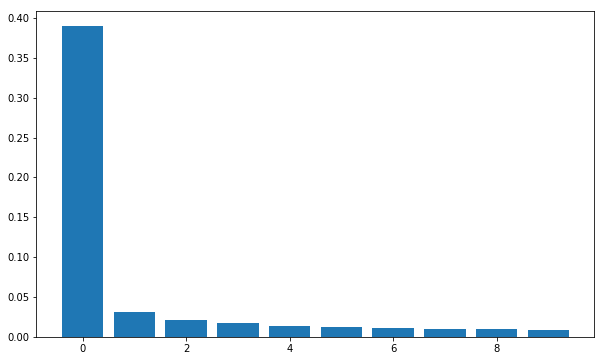

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# Make the bar plot
plt.bar(np.arange(num_factor_exposures), pca.explained_variance_ratio_);

You can see that the first factor dominates. The precise defintion of each factor in a latent model is unknown, however we can guess at the likely intepretation.

# View The Factor Returns

Remember that the factors returns don't necessarily have direct interpretations in the real world but you can thinik of them as returns time series for some kind of latent or unknown driver of return variance. 

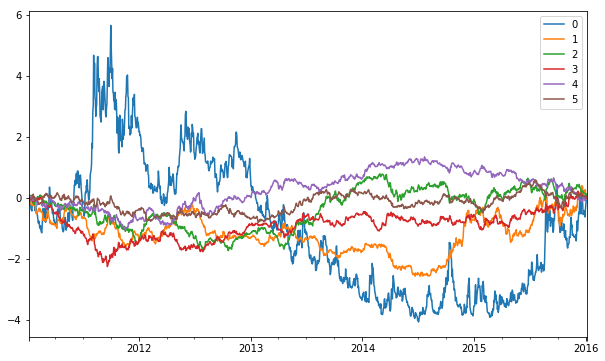

In [19]:
%matplotlib inline

import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

rm.factor_returns_.loc[:,0:5].cumsum().plot();

## Solution

[Solution notebook](pca_factor_model_solution.ipynb)